# About the Dataset
The data is regarding **Vector Borne Disease Prediction**. Submissions needs to be evaluated based on MPA@3. Each submission can contain up to 3 predictions.

## Installing necessary packages

In [2]:
#!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 17.2 MB/s eta 0:00:00


In [4]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00


In [6]:
#! pip install catboost

     ------------------------------------- 101.0/101.0 MB 12.1 MB/s eta 0:00:00
     --------------------------------------- 15.5/15.5 MB 29.7 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00


In [8]:
!pip install optuna


     -------------------------------------- 390.6/390.6 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 1.1 MB/s eta 0:00:00


## Importing the required Libraries

In [28]:
import numpy as np                       # For working with numpy arrays
import pandas as pd                      # For working with dataframes
import matplotlib.pyplot as plt          # For Visualization
import seaborn as sns                    # For Visualization

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem
from scipy.cluster.hierarchy import dendrogram, ward
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
pd.options.mode.chained_assignment = None

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)

## Importing the dataset

In [29]:
train = pd.read_csv(r"C:\Users\2211583\OneDrive - Cognizant\Python practice\Mrityunjoy's_tasks\week-2\train.csv")
test_1 = pd.read_csv(r"C:\Users\2211583\OneDrive - Cognizant\Python practice\Mrityunjoy's_tasks\week-2\test.csv")
#orig_train = pd.read_csv(r'../input/vector-borne-disease-prediction/trainn.csv')

train.drop('id', axis = 1, inplace = True)
test = test_1.drop('id', axis = 1)

# Knowing Your Data

## Descriptive Statistics

In [30]:
train.head(10)

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
6,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,West_Nile_fever
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Tungiasis
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya


In [31]:
desc = train.describe().T
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isna().sum()
desc['type'] = train.dtypes
desc

,count,mean,std,min,25%,50%,75%,max,nunique,%unique,null,type
sudden_fever,707.0,0.503536,0.500341,0.0,0.0,1.0,1.0,1.0,2,0.282885,0,float64
headache,707.0,0.449788,0.497825,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
mouth_bleed,707.0,0.459689,0.498725,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
nose_bleed,707.0,0.487977,0.500209,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
muscle_pain,707.0,0.517680,0.500041,0.0,0.0,1.0,1.0,1.0,2,0.282885,0,float64
joint_pain,707.0,0.449788,0.497825,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
vomiting,707.0,0.441301,0.496894,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
rash,707.0,0.487977,0.500209,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
diarrhea,707.0,0.390382,0.488181,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64
hypotension,707.0,0.393211,0.488809,0.0,0.0,0.0,1.0,1.0,2,0.282885,0,float64


**Key point:** All features are actually boolean. So we can load them as `np.int8()` to save memory if we want.

# Duplicates

In [32]:
print(f'There are {train.duplicated(subset = list(train)[0:-1]).value_counts()[0]} non-duplicate values out of {train.count()[0]} rows in train dataset')
print(f'There are {test.duplicated().value_counts()[0]} non-duplicate values out of {test.count()[0]} rows in test dataset')
#print(f'There are {orig_train.duplicated(subset = list(train)[0:-1]).value_counts()[0]} non-duplicate values out of {orig_train.count()[0]} rows in original train dataset')

There are 707 non-duplicate values out of 707 rows in train dataset
There are 303 non-duplicate values out of 303 rows in test dataset


# Adversarial Validation

Adversarial Validation is a smart yet simple method to identify the similarities between the training and the test dataset. It uses a simple logic – If a binary classifier model is able to differentiate between training and test samples, it means that there is a dissimilarity between the training and the test data.

In [33]:
def adversarial_validation(label = 'Train-Test'):
    """
    This function is used to verify whether our training and test data are dissimilar.
    """
    adv_train = train.drop('prognosis', axis = 1)
    if label == 'Train-Test':
        adv_test = test.copy()
#     else:
#         adv_train = pd.concat([adv_train, test], ignore_index = True)
#         adv_test = orig_train.drop('prognosis', axis = 1)

    # Creating a new feature column which indicates whether the data point is from train or test dataset.
    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    # Combining the dataset
    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    # Shuffling the dataset
    adv_shuffled = adv.sample(frac = 1)

    # Creating the independent and dependent variable for the modeling
    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    # Creating an object for stratified K Fold
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
        
    val_scores = []                             # Creating a list to save the scores for the 5 sets of sample
    predictions = np.zeros(len(adv))            # Since each datapoints will occur in the test dataset once, we are creating 
                                                # space for storing hte predicted probabilities.
    

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
    
        adv_lr = LogisticRegression(random_state = 42)                  # Creating a logistic Regression object
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])
         
        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]      # Predicted Probability
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)       # Calculating the AUC score
        val_scores.append(val_score)
    
    fpr, tpr, _ = roc_curve(adv['is_test'], predictions                 # The FPR and TPR score
    
    # Plotting the ROC
    plt.figure(figsize = (10, 10), dpi = 300)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

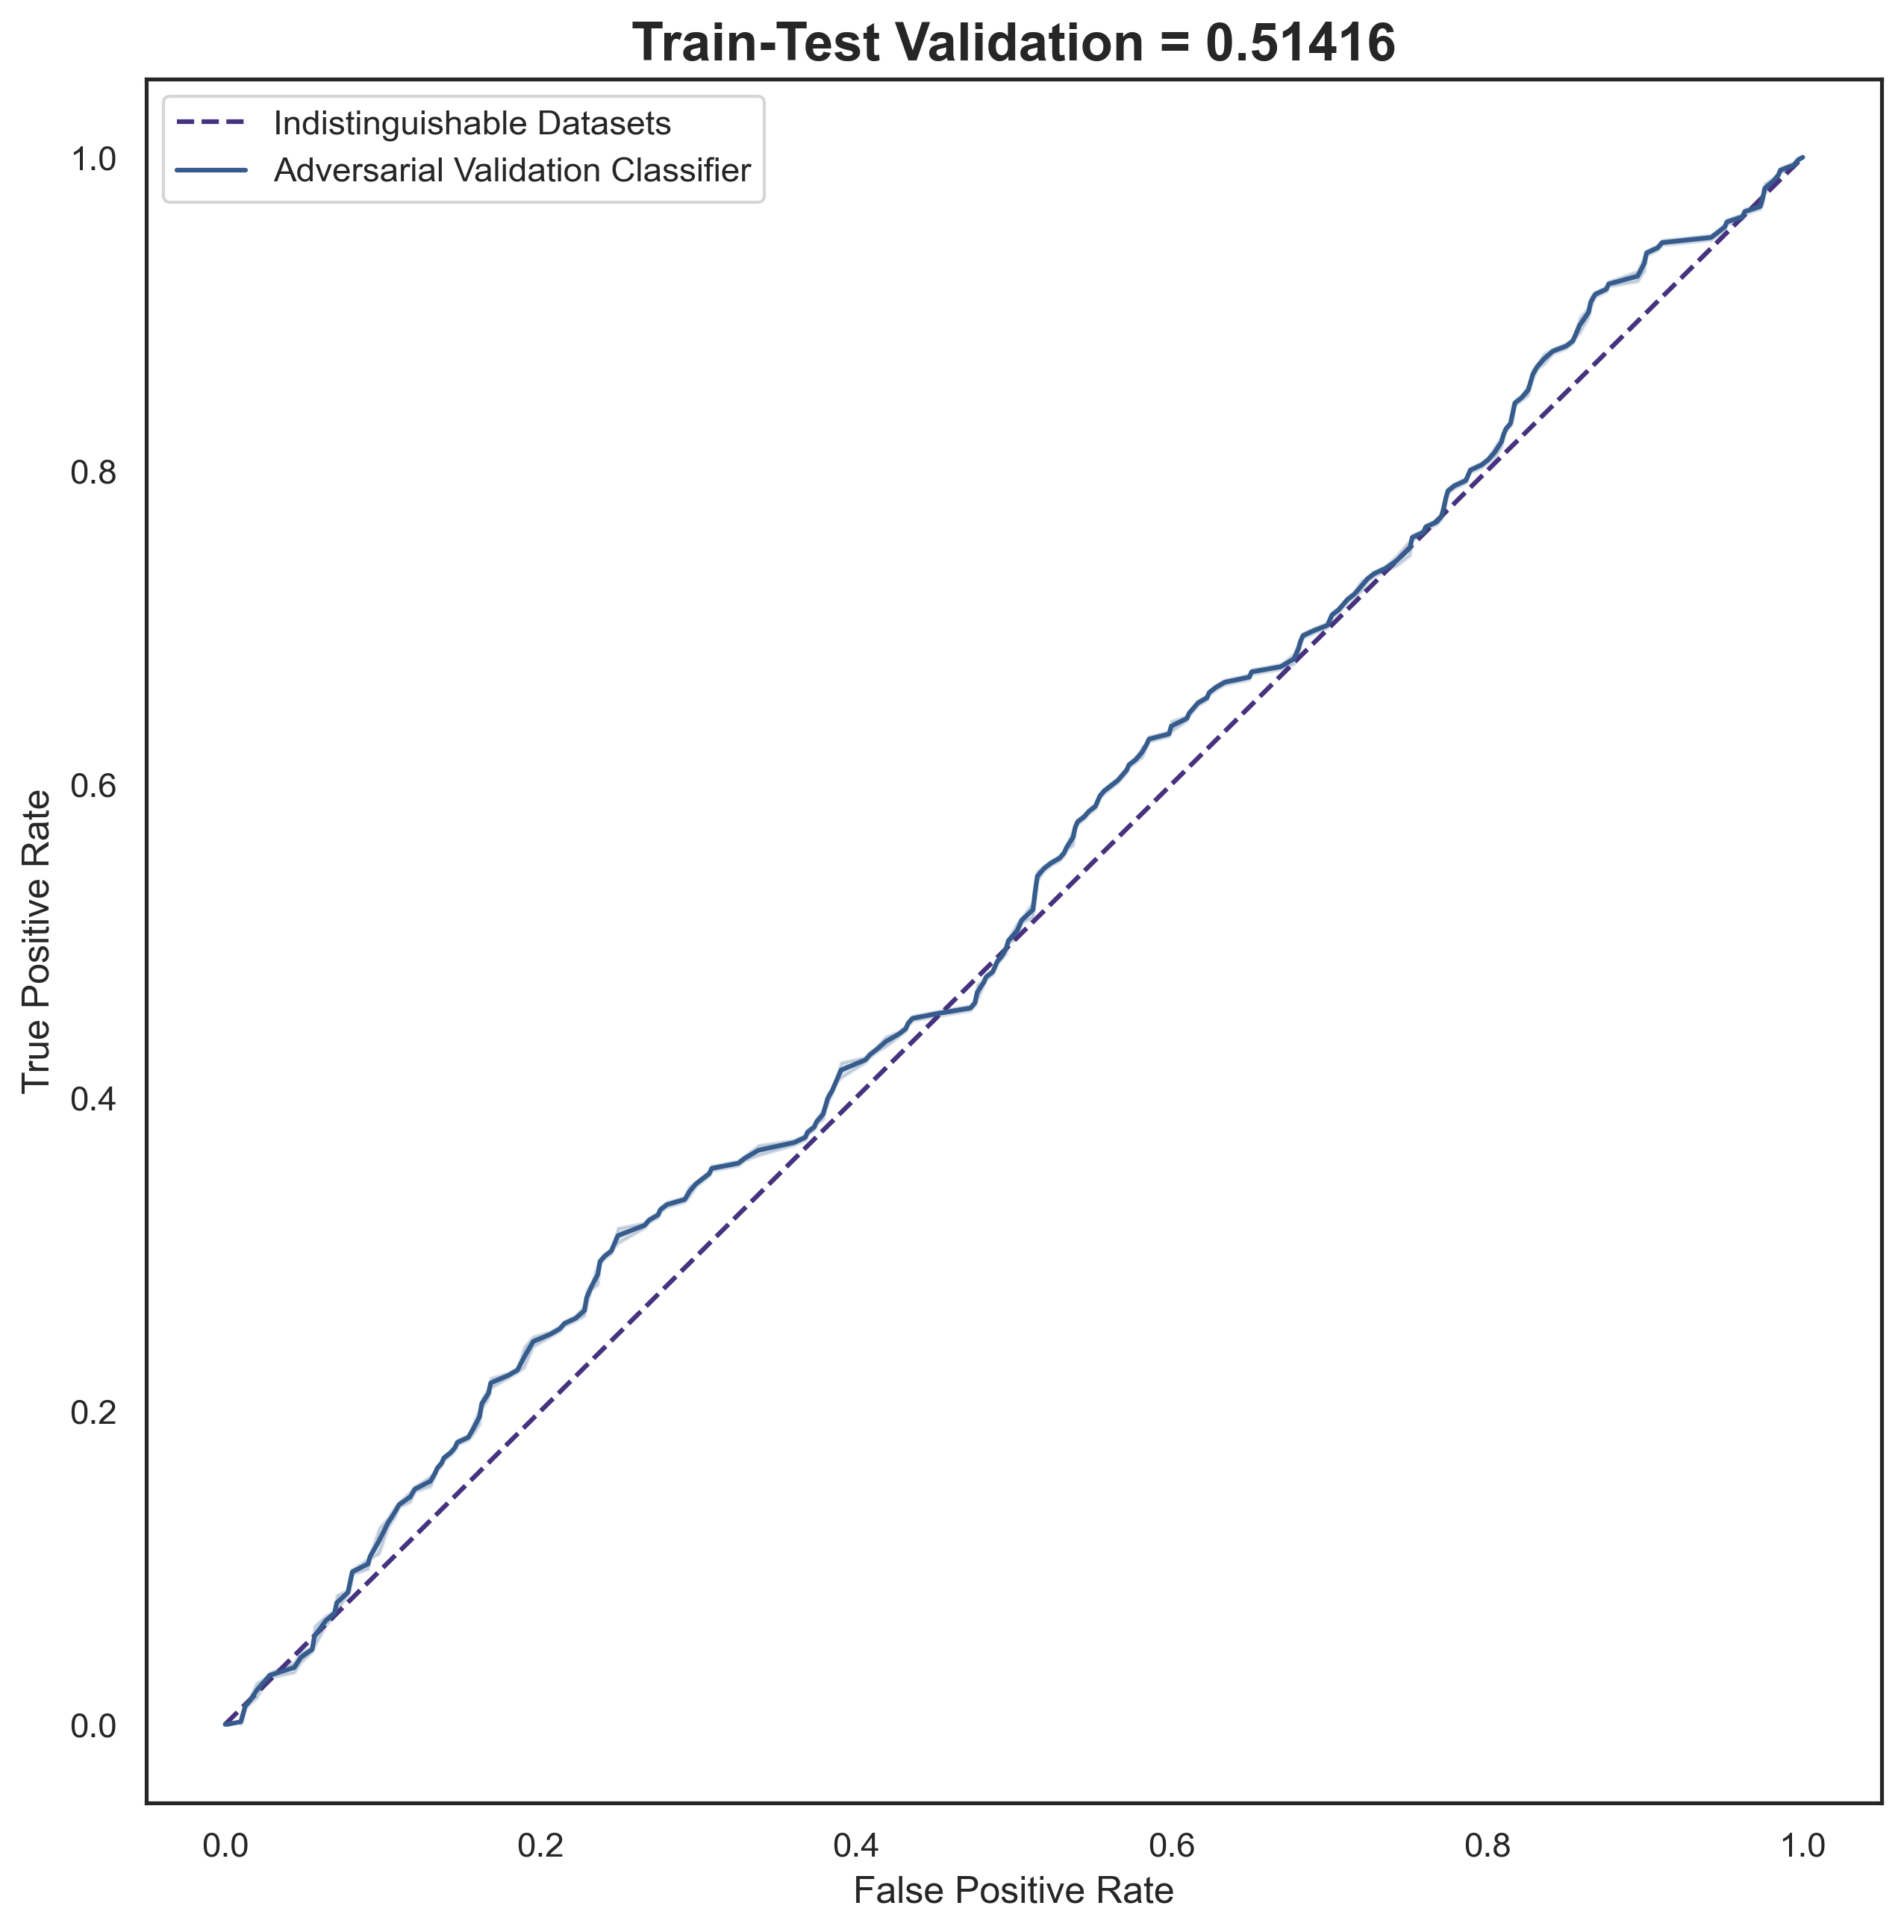

In [34]:
adversarial_validation()

**Key points:**
1. Train and test datasets validation results in ROC score of close to .5, therefore we can trust our cross-validation.

# Target Distribution

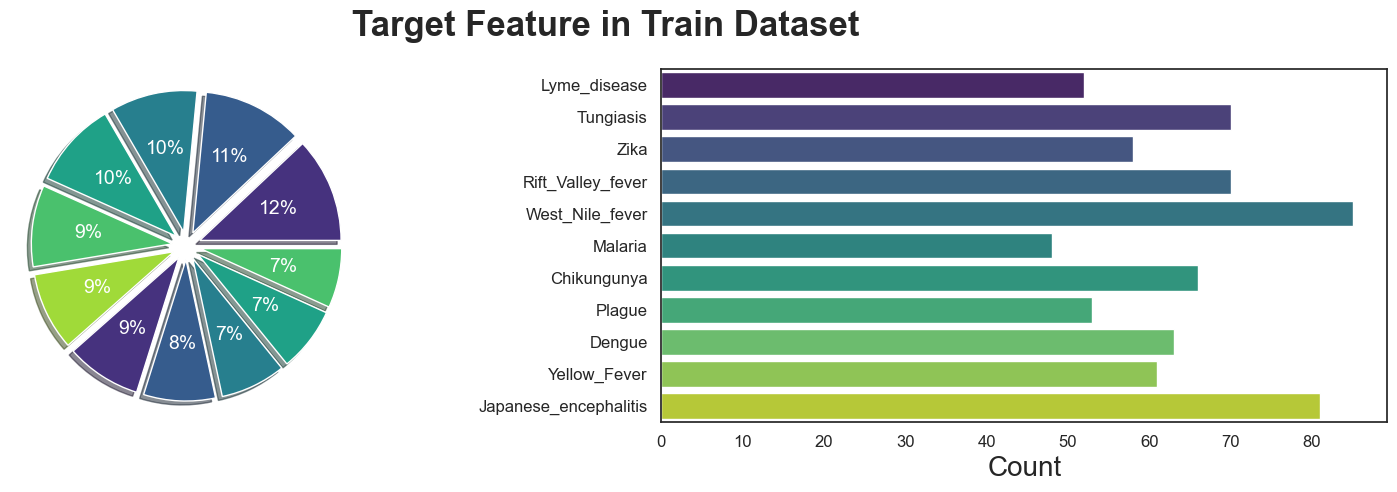

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    train['prognosis'].value_counts(), 
    shadow = True, 
    explode = [.1 for i in range(0, 11)], 
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = train, y = 'prognosis', ax = ax[1], palette = 'viridis')
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Target Feature in Train Dataset', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

**Key points:** 
1. `prognosis` has relatively balanced distribution.
2. Original dataset uses space instead of underscore to separate the word so we have to preprocess it

# Correlation

In [39]:
def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis')
    plt.yticks(fontsize = 5)
    plt.xticks(fontsize = 5)
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

C:\Users\2211583\AppData\Local\Temp\1\ipykernel_37048\1015299138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


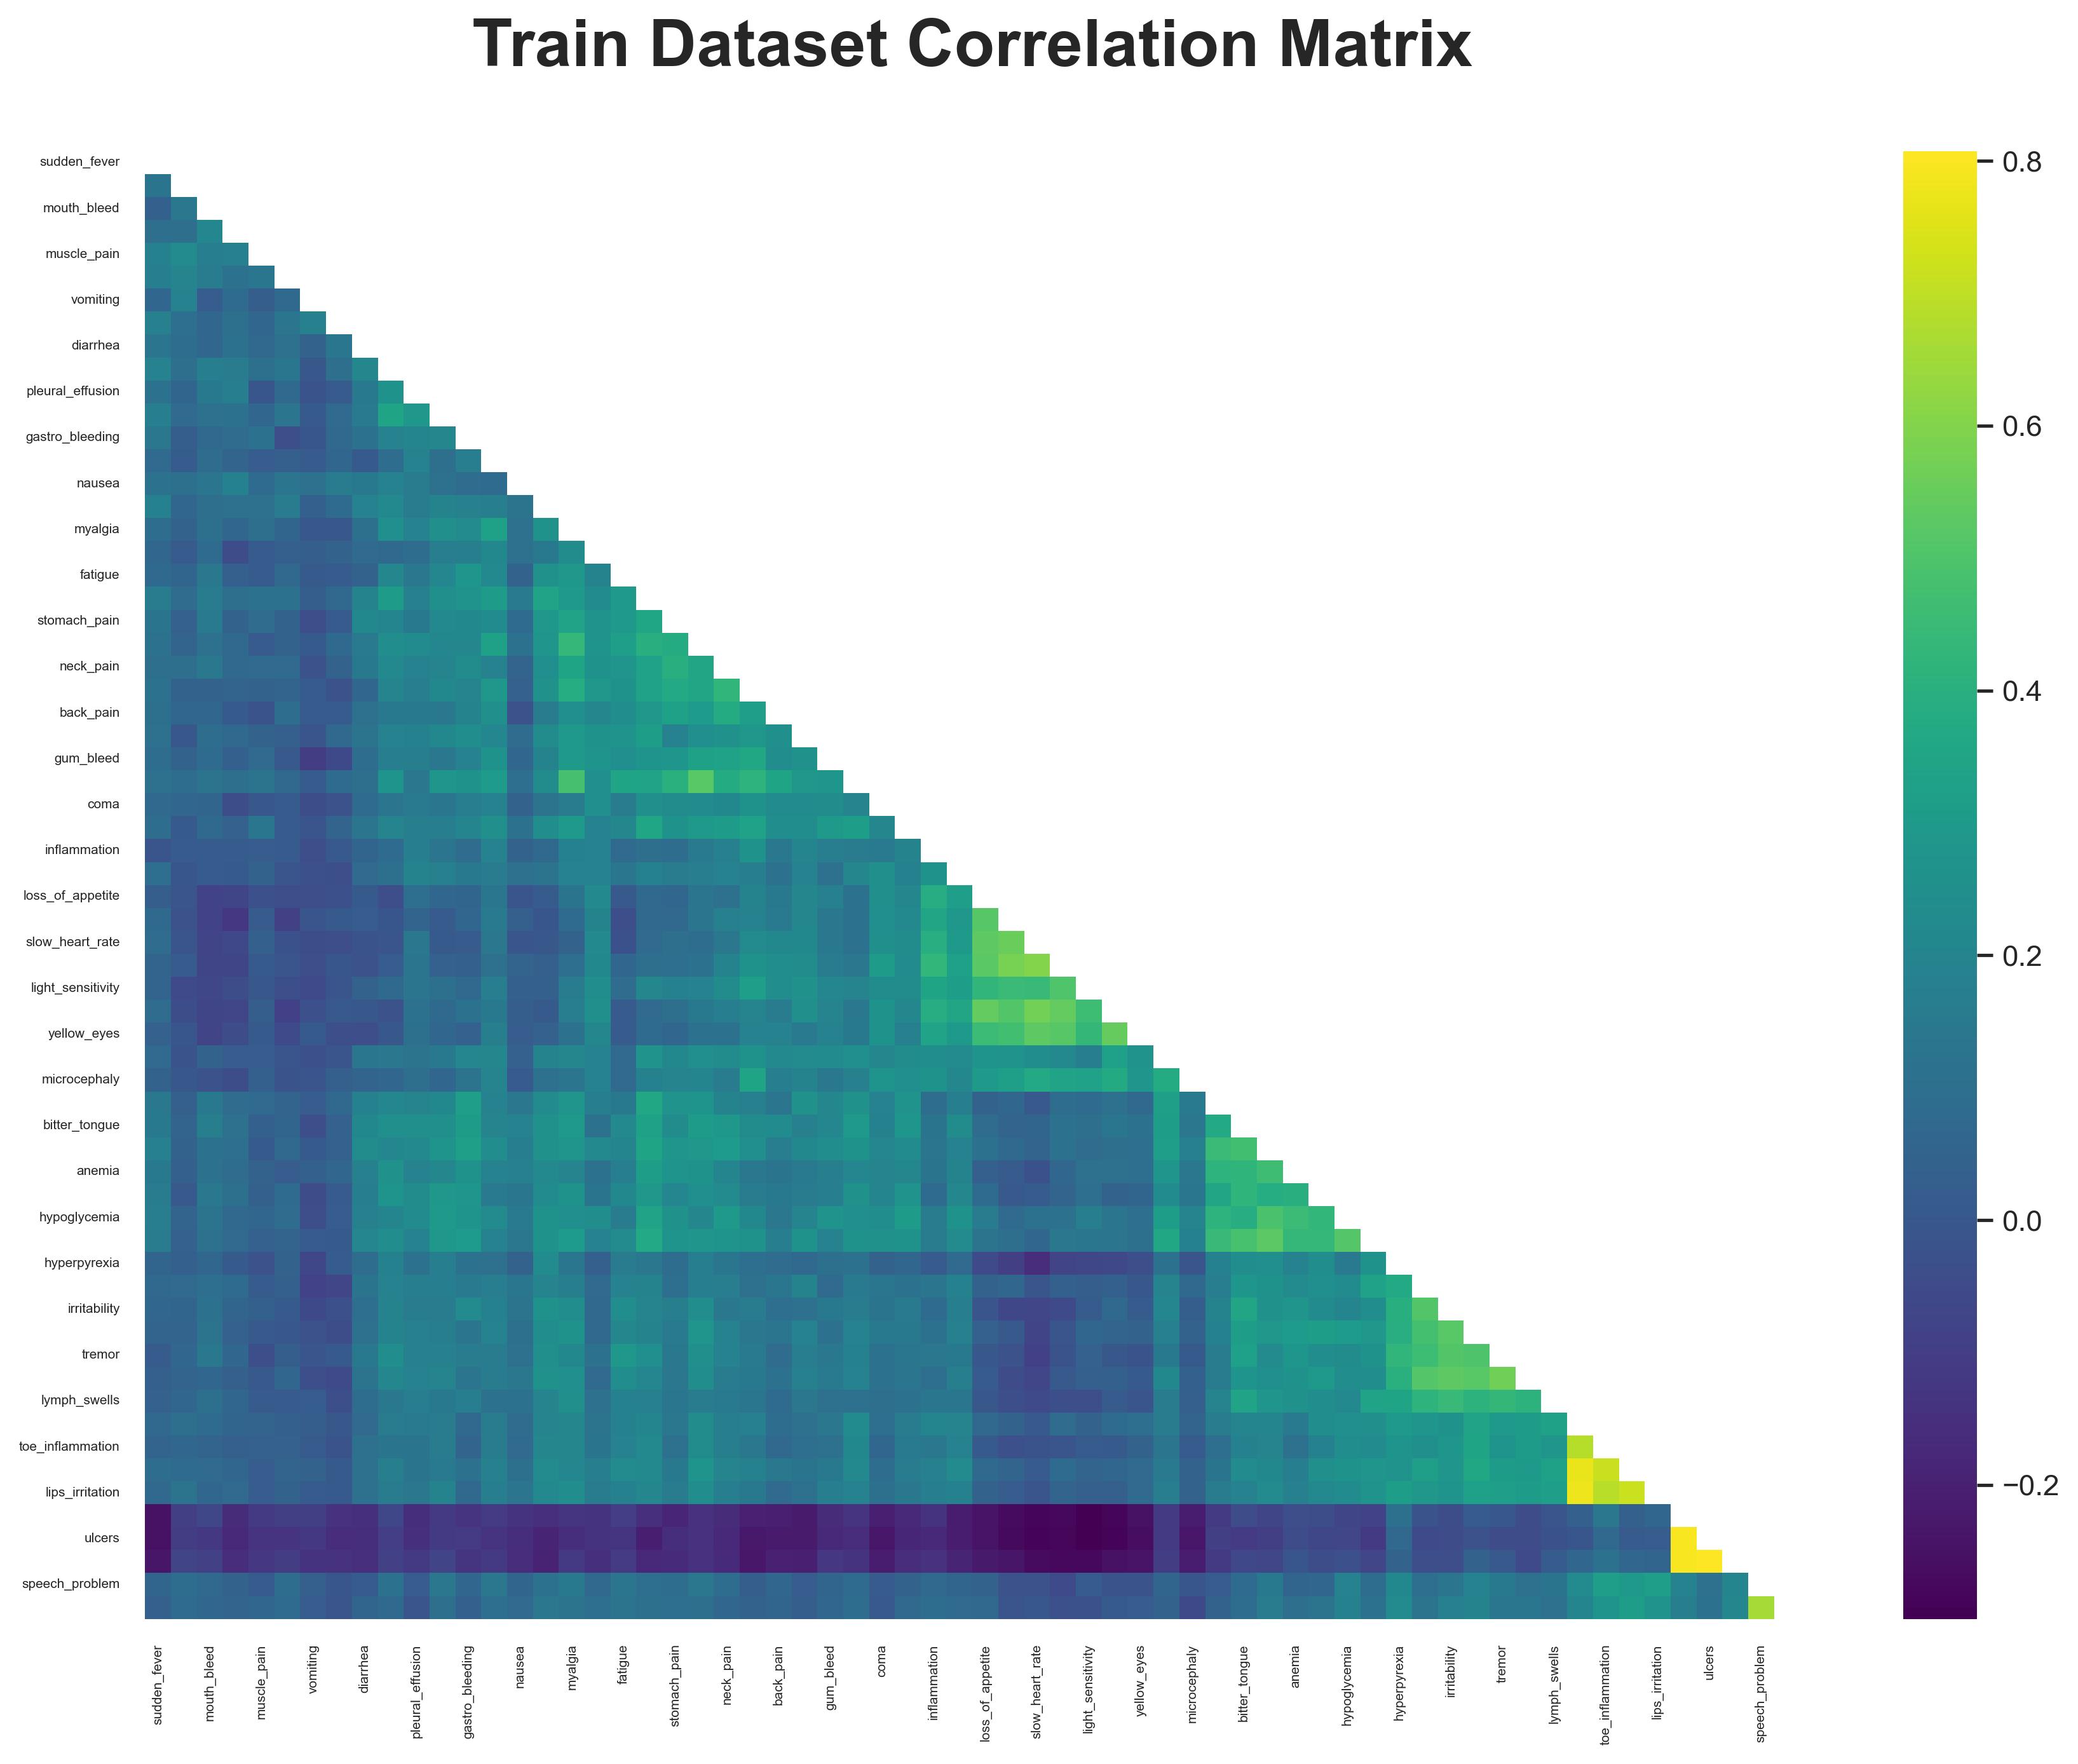

In [40]:
heatmap(train, 'Train')

There are too much features in the matrix. Let's try to infer correlation with hierarchry tree instead.

In [43]:
def distance(data, label = ''):
    distances = data.corr()
    dist_linkage = ward(distances)
    
    plt.figure(figsize = (10, 8), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.drop('prognosis', axis = 1).columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 22)
    plt.show()

C:\Users\2211583\AppData\Local\Temp\1\ipykernel_37048\3672961995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  distances = data.corr()


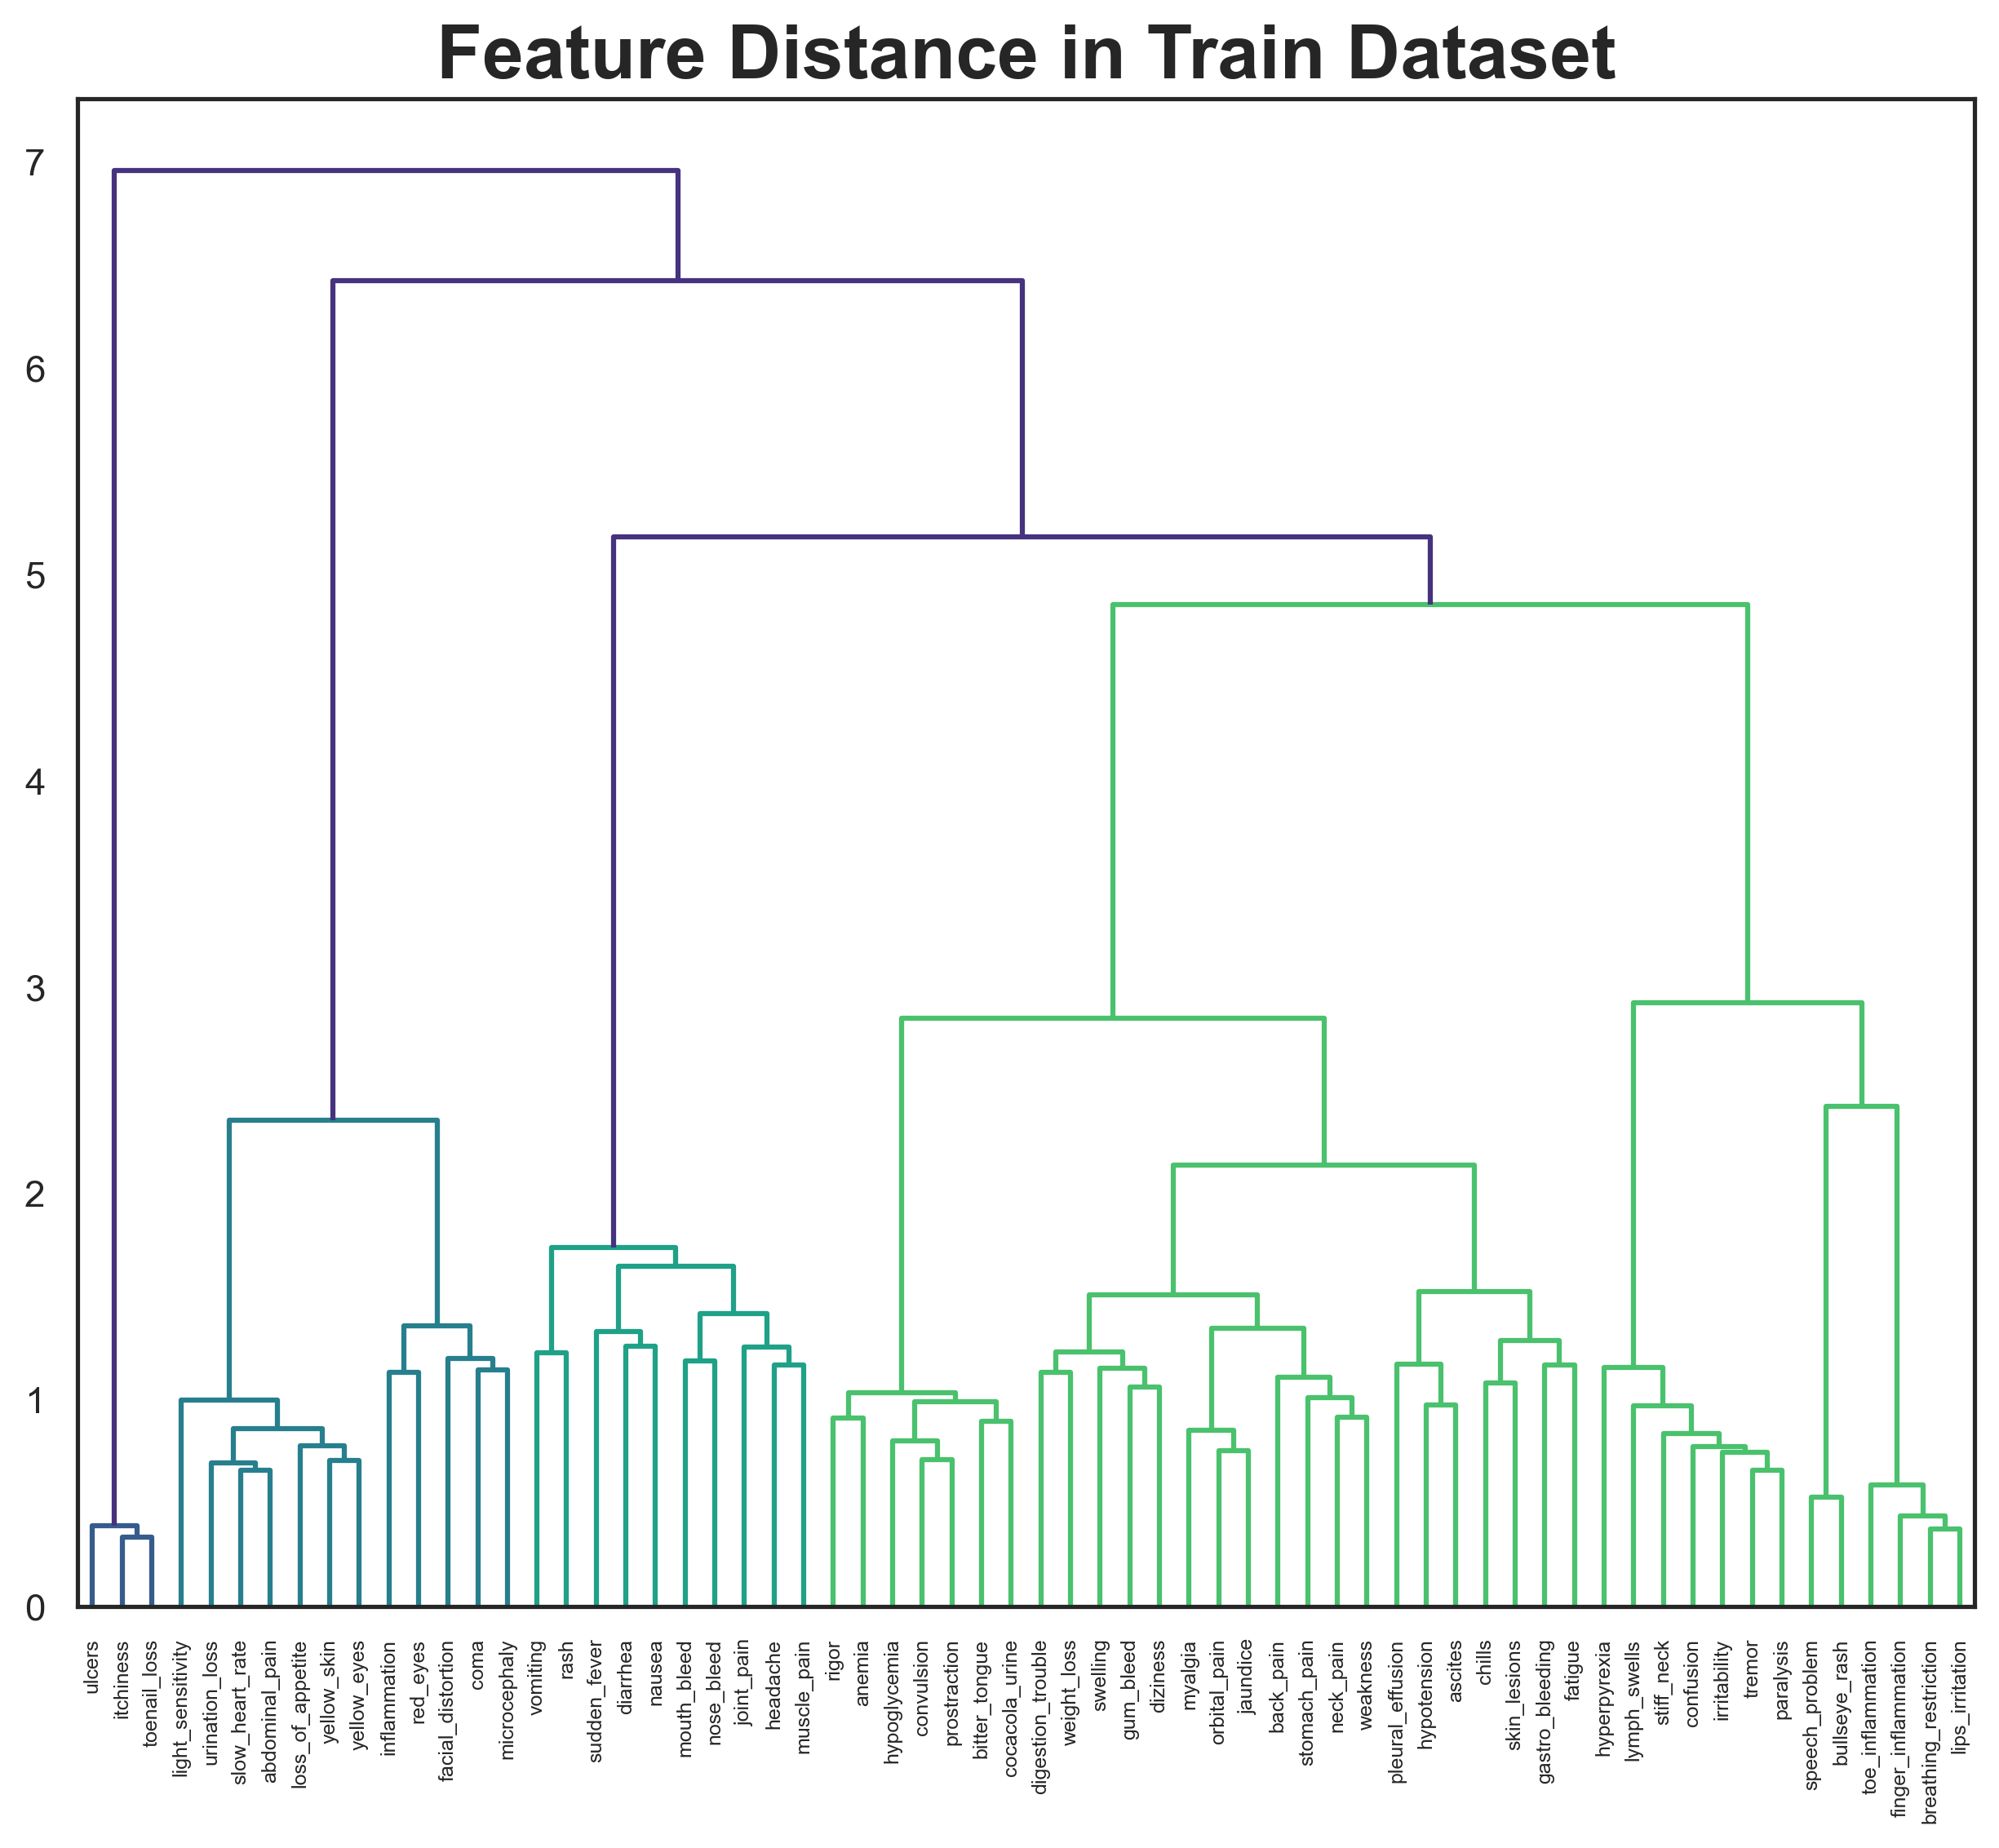

In [44]:
distance(train, 'Train')

**Key points:** 
1. We can at least confirm that `itchiness`, `ulcers`, and `toenail_loss` seems to be similar with each others but very different from the rest in all datasets. This might be something you want to keep on your mind when you want to do feature engineering.
2. If you just want simple decomposition, however, we can decompose our dataset into several features.

# Preprocessing

Let's combine composite and original dataset to train later.

In [46]:
# combo_train = pd.concat([train, orig_train], ignore_index = True)
# print(f'There are {combo_train.duplicated(subset = list(train)[0:-1]).value_counts()[0]} non-duplicate values out of {combo_train.count()[0]} rows in original train dataset')

Surprisingly, there is no duplicate in both original and composite datasets.

In [47]:
X = train.copy()
y = X.pop('prognosis')

seed = 42
splits = 5
k = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True) # Creating a Stratified K Fold object

np.random.seed(seed)

Finally, it's time for to preprocess our prognosis.

In [48]:
y = [prognosis.replace(' ', '_') for prognosis in y]

enc = LabelEncoder()
y = enc.fit_transform(y)

# Feature Engineering

In [49]:
class FE1(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x, y = None):
        
        transformed = x.copy()        
        
        similar_columns = ['loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes']
        transformed['similar_cluster'] = transformed[similar_columns].sum(axis=1)
    
        lyme_columns = ['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', 'chills', 'orbital_pain', 'digestion_trouble']
        transformed['lyme_cluster'] = transformed[lyme_columns].sum(axis=1)
    
        tungiasis_columns = ['ulcers', 'toenail_loss', 'itchiness']
        transformed['tungiasis_cluster'] = transformed[tungiasis_columns].sum(axis=1)
    
        chikungunya_columns = ['convulsion', 'finger_inflammation', 'speech_problem', 'toenail_loss', 'ulcers', 'itchiness', 'lips_irritation', 'breathing_restriction', 'toe_inflammation', 'paralysis', 'stomach_pain', 'confusion', 'irritability', 'bullseye_rash']
        transformed['chikungunya_cluster'] = transformed[chikungunya_columns].sum(axis=1)
        
        return transformed

# Base Models

### Creating a function for the evaluation  metric
MAP@K is an error metric that can be used when the sequence or ranking of your **recommended items plays an important role** or is the **objective** of your task. By using it, you get answers to the following questions:

1. Are my generated or predicted recommendations relevant?
2. Are the most relevant recommendations on the first ranks?


Now to understand the metric we have to understand the following terms:
1. **Precision at k**: The precision metric itself does not consider the rank or order in which the relevant items appear. Time to include the ranks to our precision formula. Precision@K can be defined as the fraction of relevant items in the top K recommended items.
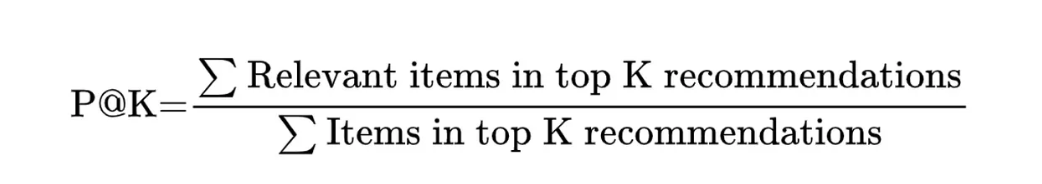

2. **Average Precision at k**: 
The Average Precision@K or AP@K is the sum of precision@K where the item at the kₜₕ rank is relevant (rel(k)) divided by the total number of relevant items (r) in the top K recommendations.
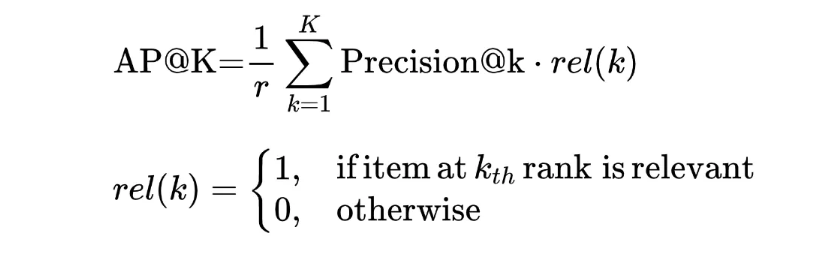

Average precision does take care of the rank, we can see from the following diagram:
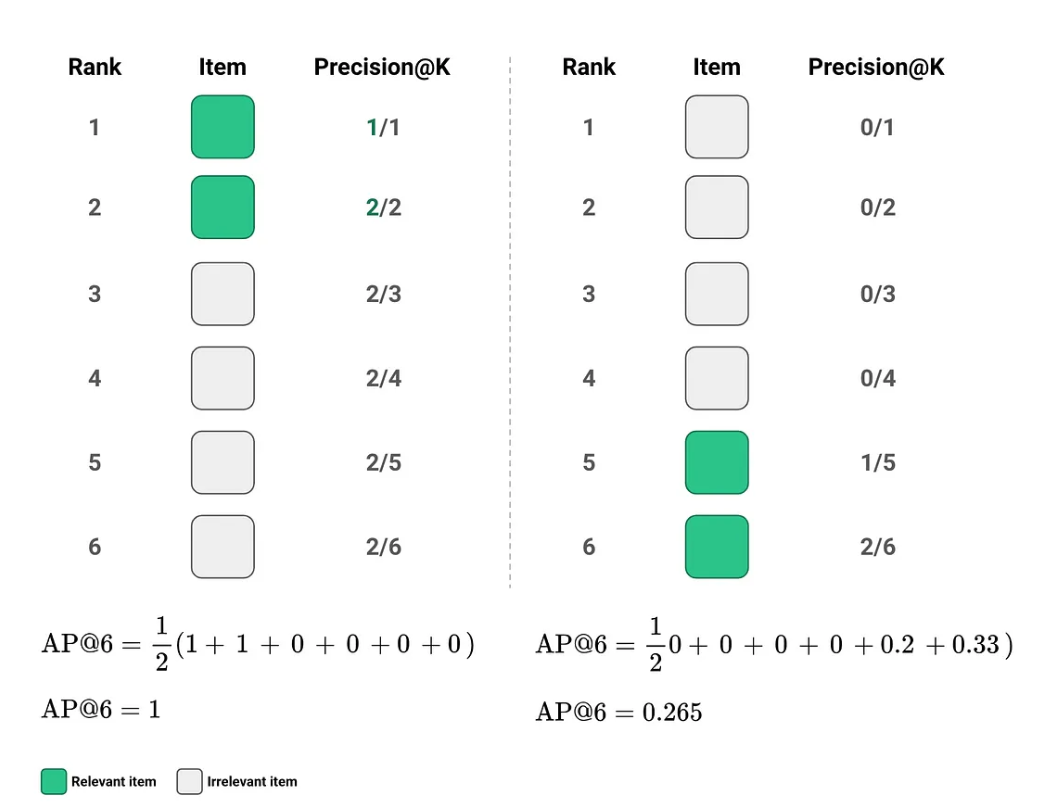

3. **Mean Average Precision at k**:
Average Precison at k evaluates one single query or one single list of recommendations one visitor gets when browsing the product detail page of product X. But we have more than one visitor…Mean Average Precision@K or MAP@K considers that. It averages the AP@K for recommendations shown to M users.
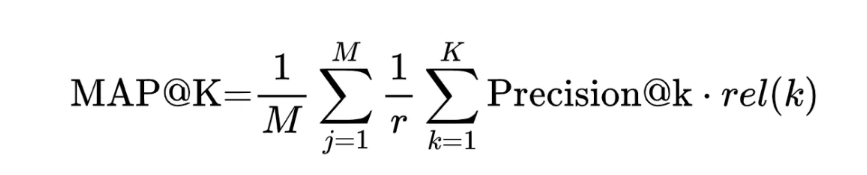


**The value of this matric lies between 0 and 1**


**SOURCE**: https://towardsdatascience.com/mean-average-precision-at-k-map-k-clearly-explained-538d8e032d2#:~:text=The%20Average%20Precision%40K%20or,K%20recommendations%20(figure%206).

In [50]:
def apk(actual, predicted, k=10):
    """This function is used to calculate the Average Precision at k"""
    if not len(actual):
        return 0.0
    
    if len(predicted)>k: 
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k) # This is the length of the ground truth

def mapk(actual, predicted, k=10):
    """This function is used to calculate the mean of the AP@k, where the dividing factor will be the number of data points in the dataset"""
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [71]:
def cross_val_score(model, cv = k, label = '', data = train):
    
    X = data.copy()
    y = X.pop('prognosis')
    
    #transforming prognosis
    y = [prognosis.replace(' ', '_') for prognosis in y]    
    y = enc.transform(y)
    
    #initiate prediction arrays and score lists
    val_predictions = np.zeros((len(data), 11))
    train_predictions = np.zeros((len(data), 11))
    train_logloss, val_logloss = [], []
    train_map3, val_map3 = [], []
    
    #training model, predicting prognosis probability, and evaluating log loss
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        
        model.fit(X.iloc[train_idx], y[train_idx])

        train_preds = model.predict_proba(X.iloc[train_idx])
        val_preds = model.predict_proba(X.iloc[val_idx])
                  
        train_predictions[train_idx] += train_preds
        val_predictions[val_idx] += val_preds
        
        train_score = log_loss(y[train_idx], train_preds)
        val_score = log_loss(y[val_idx], val_preds)
        
        train_logloss.append(train_score)
        val_logloss.append(val_score)
        
        #select three most probable prognosis based on train dataset prediction
        train_index = np.argsort(-train_preds)[:,:3] #return index of three most probable prognosis

        #select three most probable prognosis based on validation dataset prediction
        val_index = np.argsort(-val_preds)[:,:3]
    
        #calculate map@3
        train_score = mapk(y[train_idx].reshape(-1, 1), train_index, 3)
        val_score = mapk(y[val_idx].reshape(-1, 1), val_index, 3)
        
        train_map3.append(train_score)
        val_map3.append(val_score)
    
    print(f'Val log_loss   : {np.mean(val_logloss):.5f} ± {np.std(val_logloss):.5f} | Train log_loss   : {np.mean(train_logloss):.5f} ± {np.std(train_logloss):.5f} | {label}')
    print(f'Val MAP@3 Score: {np.mean(val_map3):.5f} ± {np.std(val_map3):.5f} | Train MAP@3 Score: {np.mean(train_map3):.5f} ± {np.std(train_map3):.5f} | {label}\n')
    
    return val_logloss, val_map3

In [72]:
logloss_list, map3_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('log', LogisticRegression(random_state = seed, max_iter = 10000)),
    ('svc', SVC(random_state = seed, probability = True)),
    ('lda', LinearDiscriminantAnalysis()),
    ('gauss', GaussianProcessClassifier(random_state = seed)),
    ('et', ExtraTreesClassifier(random_state = seed)),
    ('rf', RandomForestClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed, objective = 'multi:softprob', eval_metric = 'map@3')),
    ('lgb', LGBMClassifier(random_state = seed, objective = 'softmax', metric = 'softmax')),
    ('dart', LGBMClassifier(random_state = seed, objective = 'softmax', metric = 'softmax', boosting_type = 'dart')),
    ('cb', CatBoostClassifier(random_state = seed, objective = 'MultiClass', verbose = 0)),
    ('gb', GradientBoostingClassifier(random_state = seed)),
    ('hgb', HistGradientBoostingClassifier(random_state = seed)),
    ('ada', AdaBoostClassifier(random_state = seed)),
    ('knn', KNeighborsClassifier())
]

for (label, model) in models:
    (logloss_list[label], map3_list[label]) = cross_val_score(model, label = label)

Val log_loss   : 2.28799 ± 0.08526 | Train log_loss   : 1.24598 ± 0.01694 | log
Val MAP@3 Score: 0.41503 ± 0.03258 | Train MAP@3 Score: 0.70344 ± 0.00567 | log

Val log_loss   : 1.86038 ± 0.03747 | Train log_loss   : 1.26779 ± 0.01631 | svc
Val MAP@3 Score: 0.44950 ± 0.02327 | Train MAP@3 Score: 0.83387 ± 0.02303 | svc

Val log_loss   : 2.77131 ± 0.07160 | Train log_loss   : 1.48518 ± 0.02477 | lda
Val MAP@3 Score: 0.42046 ± 0.03477 | Train MAP@3 Score: 0.64969 ± 0.00375 | lda

Val log_loss   : 2.34453 ± 0.00734 | Train log_loss   : 2.04186 ± 0.00315 | gauss
Val MAP@3 Score: 0.39700 ± 0.00965 | Train MAP@3 Score: 0.99140 ± 0.00132 | gauss

Val log_loss   : 2.59651 ± 0.26390 | Train log_loss   : 0.00000 ± 0.00000 | et
Val MAP@3 Score: 0.43306 ± 0.01015 | Train MAP@3 Score: 1.00000 ± 0.00000 | et

Val log_loss   : 2.13831 ± 0.16800 | Train log_loss   : 0.34998 ± 0.00106 | rf
Val MAP@3 Score: 0.43236 ± 0.01014 | Train MAP@3 Score: 1.00000 ± 0.00000 | rf

Val log_loss   : 2.49032 ± 0.10549

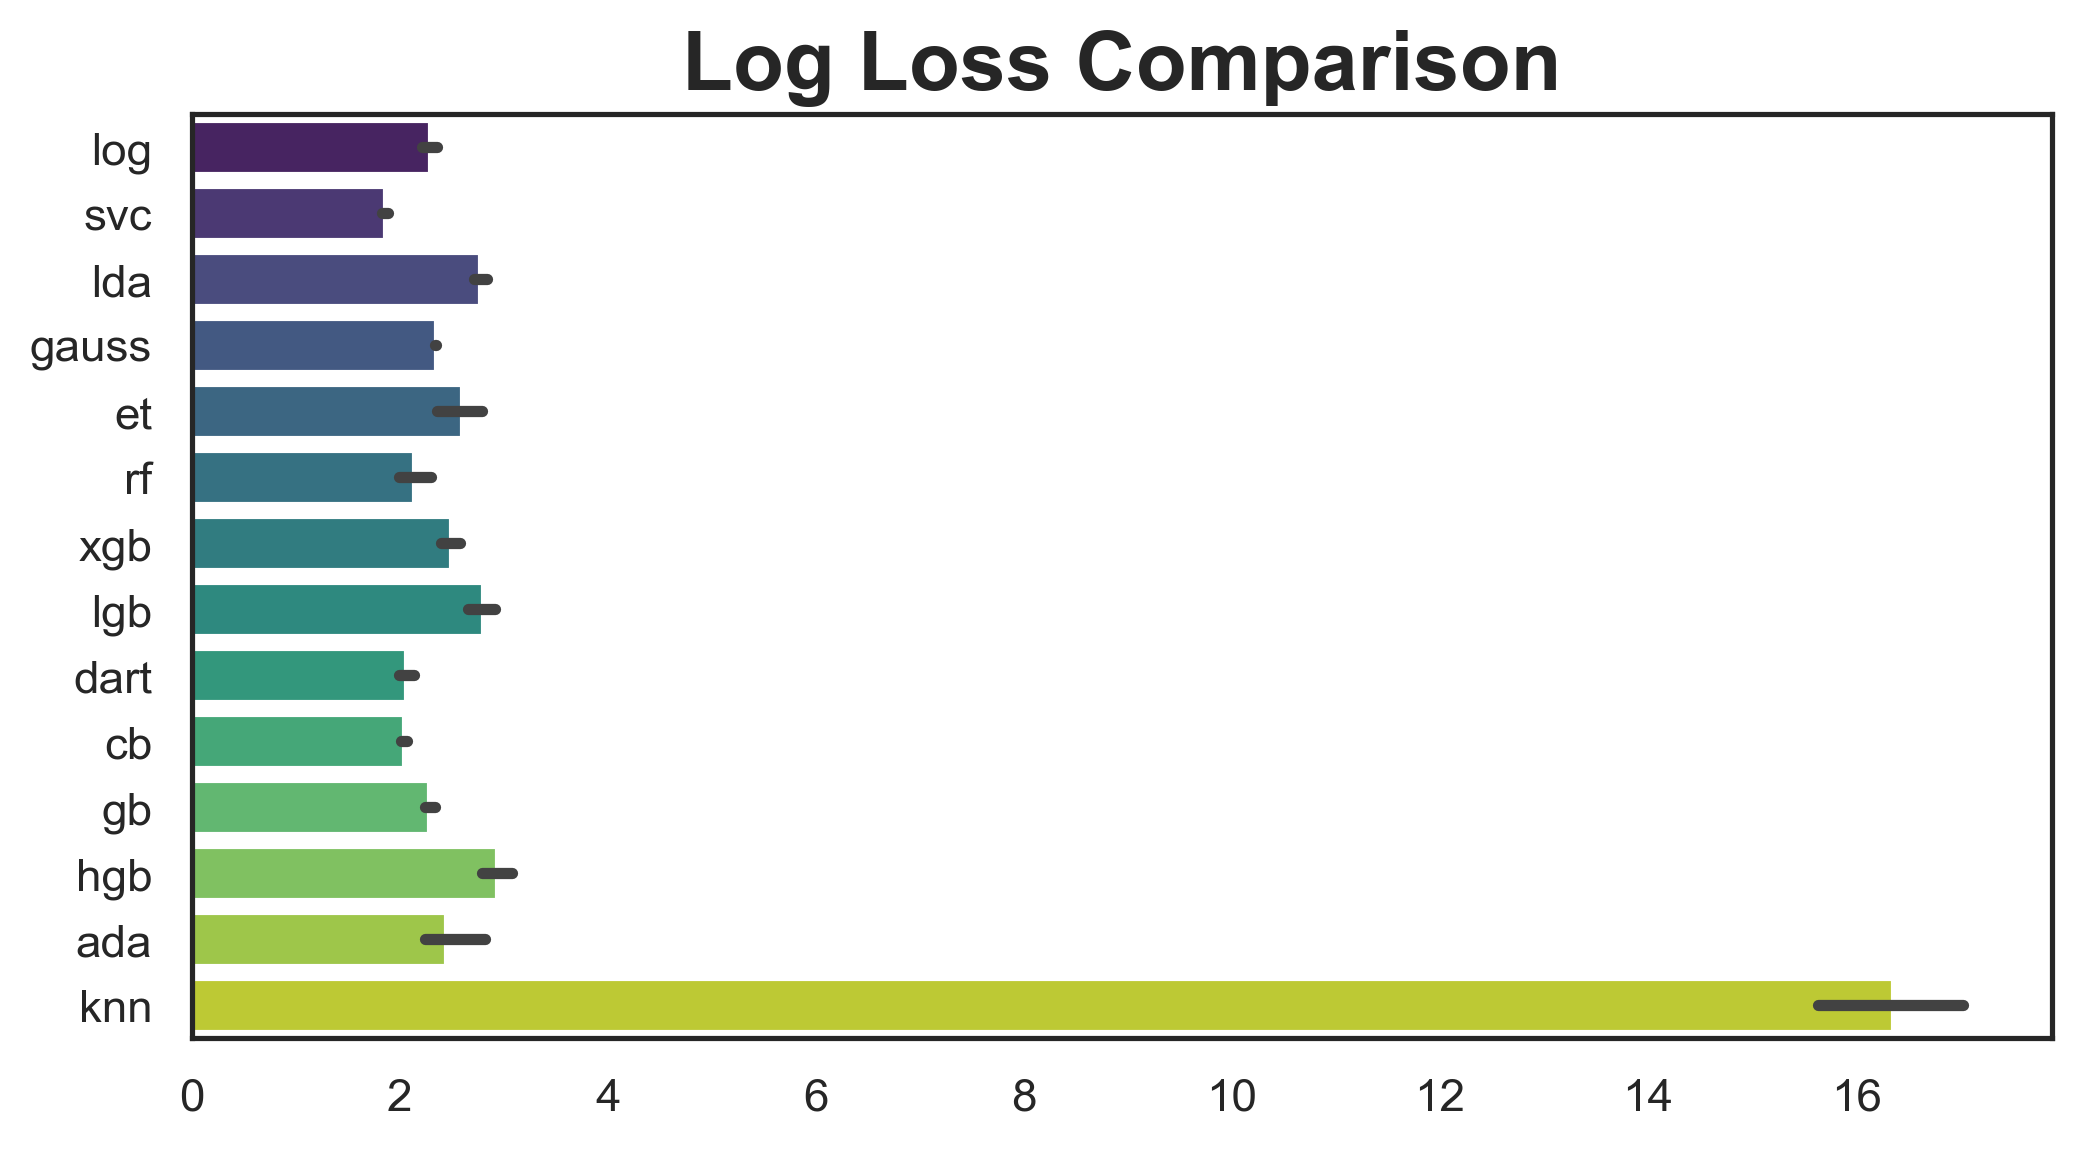

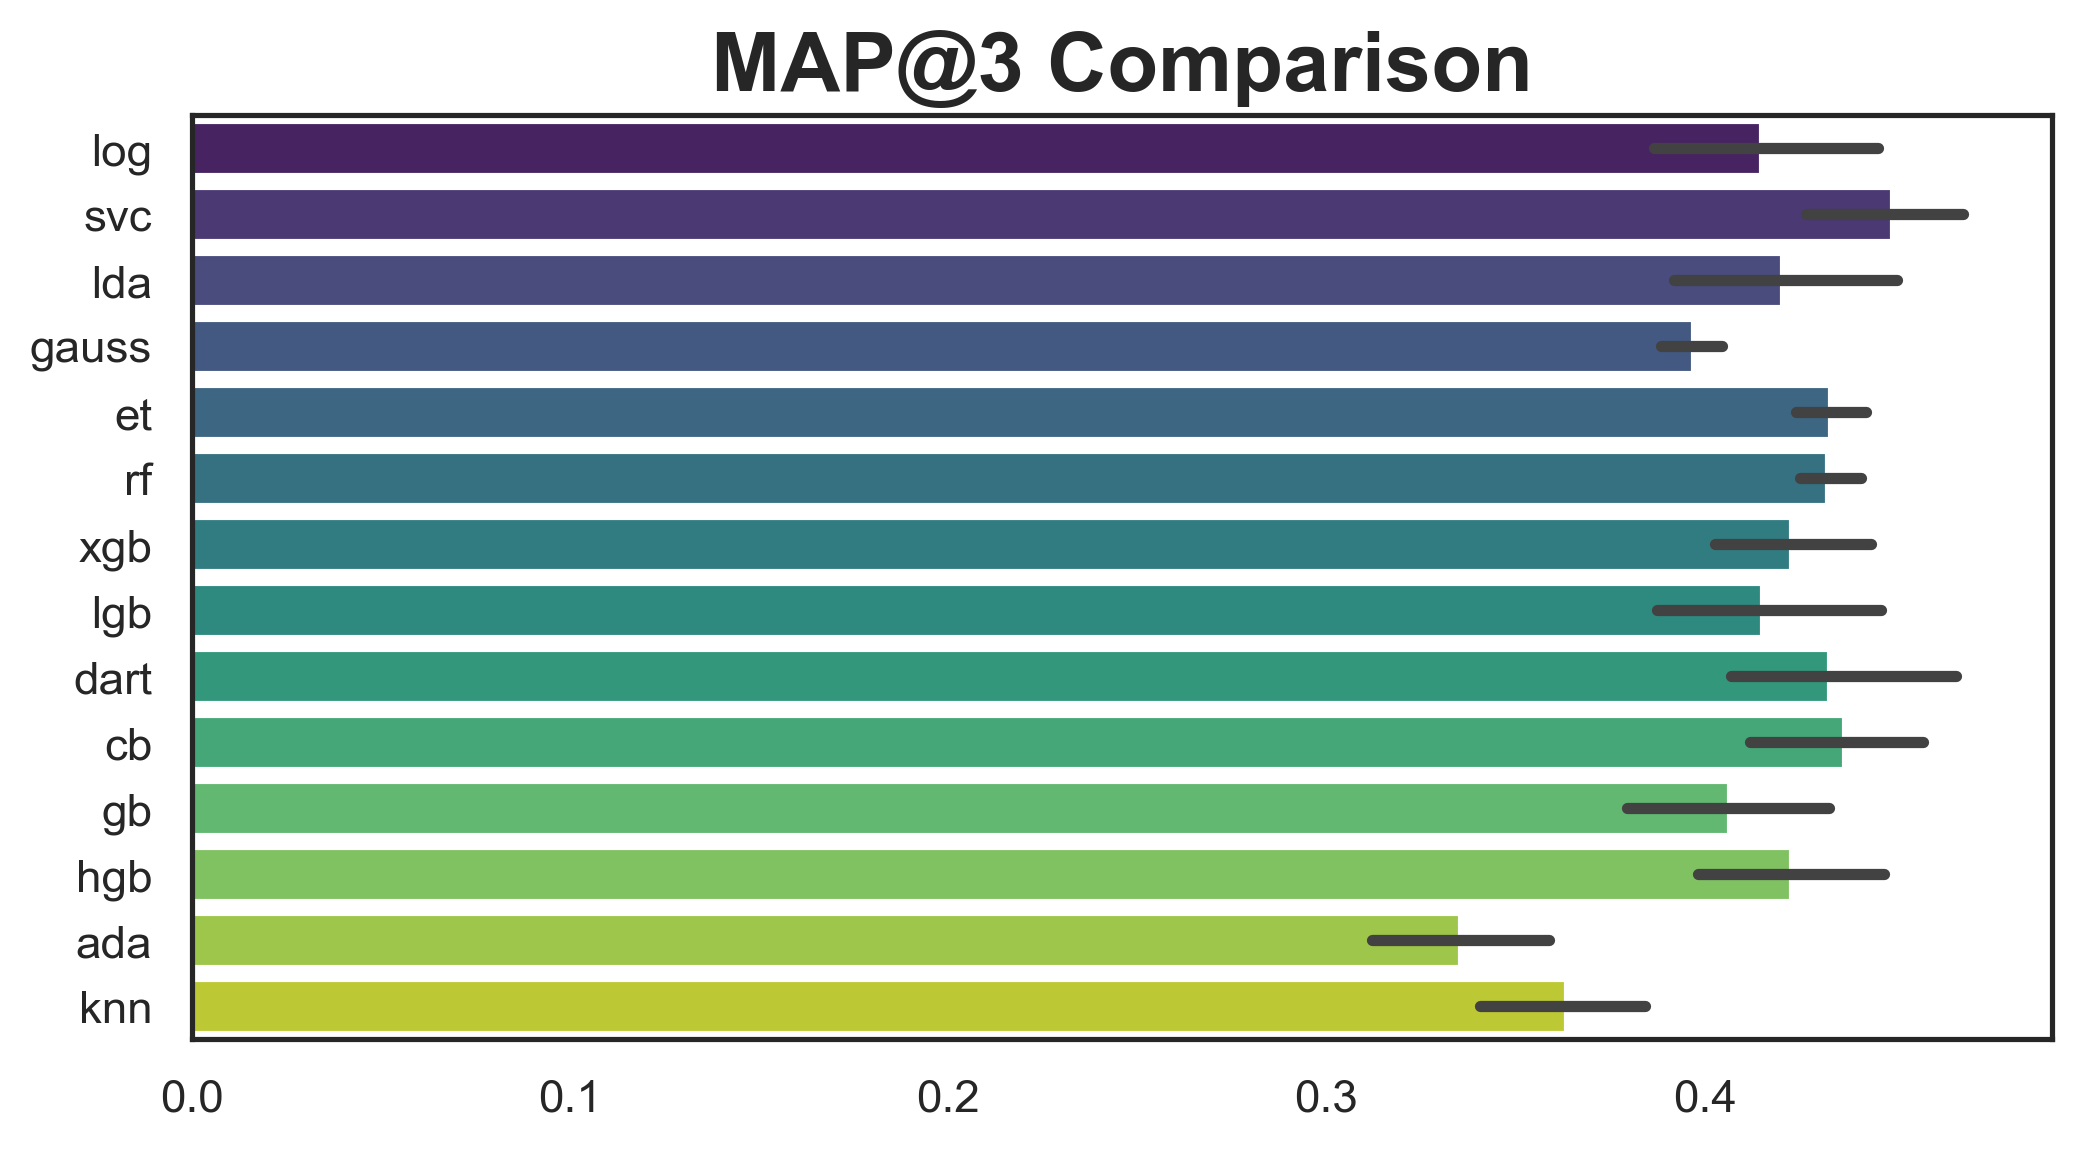

In [55]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = logloss_list, palette = 'viridis', orient = 'h')
plt.title('Log Loss Comparison', weight = 'bold', size = 20)
plt.show()

plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = map3_list, palette = 'viridis', orient = 'h')
plt.title('MAP@3 Comparison', weight = 'bold', size = 20)
plt.show()

# Logistic Regression

In [76]:
LogModel = Pipeline([
    ('fe', FE1()),
    ('pca', PCA(6, random_state = seed)),
    ('model', LogisticRegression(penalty = 'l2', solver = 'saga', random_state = seed, max_iter = 1000000, C = 1.49, n_jobs = -1))
])

_ = cross_val_score(
    LogModel,
    label = 'Log'
)

Val log_loss   : 1.88855 ± 0.04129 | Train log_loss   : 1.79784 ± 0.00987 | Log
Val MAP@3 Score: 0.46411 ± 0.02239 | Train MAP@3 Score: 0.48697 ± 0.00582 | Log



# SVC

In [77]:
SVCModel = Pipeline([
    ('fe', FE1()),
    ('select', SelectFromModel(estimator = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = seed, max_iter = 10000000, C = .53))),
    ('pca', PCA(19, random_state = seed)),
    ('model', SVC(random_state = seed, probability = True, C = 1.29))
])

_ = cross_val_score(
    SVCModel,
    label = 'SVC'
)

Val log_loss   : 1.88277 ± 0.04718 | Train log_loss   : 1.61159 ± 0.01173 | SVC
Val MAP@3 Score: 0.47287 ± 0.01157 | Train MAP@3 Score: 0.60744 ± 0.00567 | SVC



# LDA

In [78]:
LDAModel = Pipeline([
    ('fe', FE1()),
    ('nyst', Nystroem(random_state = seed, n_components = 20, n_jobs = -1)),
    ('pca', PCA(16, random_state = seed)),
    ('model', LinearDiscriminantAnalysis())
])

_ = cross_val_score(
    LDAModel,
    label = 'LDA'
)

Val log_loss   : 2.25163 ± 0.07370 | Train log_loss   : 2.02050 ± 0.02512 | LDA
Val MAP@3 Score: 0.46034 ± 0.02024 | Train MAP@3 Score: 0.50424 ± 0.00686 | LDA



# Gaussian Process

In [79]:
GaussModel = Pipeline([
    ('fe', FE1()),
    ('nyst', Nystroem(random_state = seed, n_components = 100, n_jobs = -1)),
    ('model', GaussianProcessClassifier(random_state = seed, n_jobs = -1))
])

_ = cross_val_score(
    GaussModel,
    label = 'Gaussian Process'
)

Val log_loss   : 1.96846 ± 0.02899 | Train log_loss   : 1.86774 ± 0.01058 | Gaussian Process
Val MAP@3 Score: 0.44811 ± 0.02211 | Train MAP@3 Score: 0.53153 ± 0.00594 | Gaussian Process



# KNN

In [80]:
KNNModel = Pipeline([
    ('fe', FE1()),
    ('select', SelectFromModel(estimator = LogisticRegression(penalty = 'l1', solver = 'saga', random_state = seed, max_iter = 10000000, n_jobs = -1))),
    ('pca', PCA(7, random_state = seed)),
    ('model', KNeighborsClassifier(55, n_jobs = -1))
])

_ = cross_val_score(
    KNNModel,
    label = 'K-Nearest Neighbors'
)

Val log_loss   : 2.30111 ± 0.14417 | Train log_loss   : 1.81830 ± 0.01309 | K-Nearest Neighbors
Val MAP@3 Score: 0.44832 ± 0.02729 | Train MAP@3 Score: 0.48238 ± 0.00672 | K-Nearest Neighbors



# Random Forest

In [81]:
RFModel = Pipeline([
    ('fe', FE1()),
    ('select', SelectFromModel(estimator = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = seed, max_iter = 10000000))),
    ('model', RandomForestClassifier(random_state = seed, min_samples_leaf = 44, n_estimators = 100, n_jobs = -1))
])

_ = cross_val_score(
    RFModel,
    label = 'Random Forest'
)

Val log_loss   : 2.02918 ± 0.02646 | Train log_loss   : 1.95212 ± 0.00868 | Random Forest
Val MAP@3 Score: 0.43515 ± 0.02505 | Train MAP@3 Score: 0.49658 ± 0.00587 | Random Forest



# Extra Trees

In [82]:
ETModel = Pipeline([
    ('fe', FE1()),
    ('model', ExtraTreesClassifier(random_state = seed, min_samples_leaf = 70, n_estimators = 100, n_jobs = -1))
])

_ = cross_val_score(
    ETModel,
    label = 'Extra Trees'
)

Val log_loss   : 2.06284 ± 0.02082 | Train log_loss   : 1.99337 ± 0.00855 | Extra Trees
Val MAP@3 Score: 0.42030 ± 0.02722 | Train MAP@3 Score: 0.48786 ± 0.00452 | Extra Trees



# DART

In [83]:
DartModel = Pipeline([
    ('fe', FE1()),
    ('model', LGBMClassifier(
        random_state = seed, 
        objective = 'softmax', 
        metric = 'softmax', 
        boosting_type = 'dart',
        n_jobs = -1,
        
        max_depth = 8,
        learning_rate = .04,
        reg_lambda = 15.2,
        reg_alpha = 2.1,
        subsample = .5,
        colsample_bytree = .5,
        min_child_samples = 48
    )
    )
])

_ = cross_val_score(
    DartModel,
    label = 'Dart'
)

Val log_loss   : 2.07965 ± 0.01837 | Train log_loss   : 1.96583 ± 0.01209 | Dart
Val MAP@3 Score: 0.46295 ± 0.01963 | Train MAP@3 Score: 0.58770 ± 0.00821 | Dart



# XGBoost

In [84]:
XGBModel = Pipeline([
    ('fe', FE1()),
    ('model', XGBClassifier(
        random_state = seed, 
        objective = 'multi:softprob', 
        eval_metric = 'mlogloss',
        n_jobs = -1,
        
        max_depth = 12,
        eta = .001,
        reg_lambda = 10,
        reg_alpha = 1,
        subsample = .5,
        colsample_bytree = .5,
        min_child_weight = 5,
        n_estimators = 100
    )
    )
])

_ = cross_val_score(
    XGBModel,
    label = 'XGBoost'
)

Val log_loss   : 2.37373 ± 0.00095 | Train log_loss   : 2.36807 ± 0.00097 | XGBoost
Val MAP@3 Score: 0.45375 ± 0.02145 | Train MAP@3 Score: 0.56966 ± 0.00658 | XGBoost



# LightGBM

In [85]:
LGBModel = Pipeline([
    ('fe', FE1()),
    
    ('model', LGBMClassifier(
        random_state = seed, 
        objective = 'softmax', 
        metric = 'softmax', 
        n_jobs = -1,
        
        max_depth = 6,
        learning_rate = .02,
        reg_lambda = 13,
        reg_alpha = 1.5,
        subsample = .5,
        colsample_bytree = .5,
        min_child_samples = 50
    )
    )
])

_ = cross_val_score(
    LGBModel,
    label = 'LightGBM'
)

Val log_loss   : 2.00523 ± 0.02326 | Train log_loss   : 1.83069 ± 0.01198 | LightGBM
Val MAP@3 Score: 0.46108 ± 0.01537 | Train MAP@3 Score: 0.60166 ± 0.00746 | LightGBM



# Optuna and Ensemble CV
Now we are going to create a model which uses voting from the different classifiers.The weight associated to the vote of each classifier is computed using the open source library Optuna. It used **bayesian optimization** to find the best hyperameters with utilizing the minimum computation.

In [86]:
models = [
    ('log', LogModel),
    ('svc', SVCModel),
    ('lda', LDAModel),
    ('gauss', GaussModel),
    ('knn', KNNModel),
    ('rf', RFModel),
    ('et', ETModel),
    ('dart', DartModel),
    ('xgb', XGBModel),
    ('lgb', LGBModel)
]

In [87]:
# Creating the class for the ensembled classifier which utilizes voting 
class Classifier:
    def __init__(self, weight0=1, weight1=1, weight2=1, weight3=1, weight4=1, weight5=1, weight6=1, weight7=1, weight8=1, weight9=1):
        self.weight0 = weight0
        self.weight1 = weight1
        self.weight2 = weight2
        self.weight3 = weight3
        self.weight4 = weight4
        self.weight5 = weight5
        self.weight6 = weight6
        self.weight7 = weight7
        self.weight8 = weight8
        self.weight9 = weight9
        self.estimator = VotingClassifier(
            models,
            voting = 'soft',
            weights = [
                self.weight0,
                self.weight1,
                self.weight2,
                self.weight3,
                self.weight4,
                self.weight5,
                self.weight6,
                self.weight7,
                self.weight8,
                self.weight9
            ]
        )
    
    def fit(self, X, y):
        return self.estimator.fit(X, y)
    
    def predict_proba(self, X, y = None):
        return self.estimator.predict_proba(X)

#### Creating the function for running Optuna

In [35]:
#def objective(trial):
     # Here we are specifying the paramter space.
#    params = {
#        'weight0': trial.suggest_float('weight0', 0, 100),
#        'weight1': trial.suggest_float('weight1', 0, 100),
#        'weight2': trial.suggest_float('weight2', 0, 100),
#        'weight3': trial.suggest_float('weight3', 0, 100),
#        'weight4': trial.suggest_float('weight4', 0, 100),
#        'weight5': trial.suggest_float('weight5', 0, 100),
#        'weight6': trial.suggest_float('weight6', 0, 100),
#        'weight7': trial.suggest_float('weight7', 0, 100),
#        'weight8': trial.suggest_float('weight8', 0, 100),
#        'weight9': trial.suggest_float('weight9', 0, 100)
#    }
     # Creating the instance of the classifier
#    optuna_model = Classifier(**params)
#    optuna_logloss, optuna_map3 = cross_val_score(optuna_model)
     # Specifying the metric which needs to be maximized by Optuna  
#    return np.mean(optuna_map3)

# Initializing an optuna object
#study = optuna.create_study(direction='maximize')
# Intializing to find the best parameters
#study.optimize(objective, n_trials = 100)

In [36]:
#study.best_trial.params


# The best paramters are found to be the following:
#{'weight0': 43.98496864510151,
#'weight1': 96.57899220476335,
#'weight2': 79.25909199650667,
#'weight3': 23.696594200119506,
#'weight4': 9.660906324449103,
#'weight5': 60.875117800168454,
#'weight6': 52.82083123331113,
#'weight7': 39.69309472621976,
#'weight8': 36.64711205196836,
#'weight9': 22.09165971781609}

In [88]:
EnsembleModel = Classifier(
    43.98496864510151,
    96.57899220476335,
    79.25909199650667,
    23.696594200119506,
    9.660906324449103,
    60.875117800168454,
    52.82083123331113,
    39.69309472621976,
    36.64711205196836,
    22.09165971781609
)

_ = cross_val_score(
    EnsembleModel,
    label = 'Ensemble'
)

Val log_loss   : 1.91919 ± 0.03082 | Train log_loss   : 1.77821 ± 0.01014 | Ensemble
Val MAP@3 Score: 0.47167 ± 0.01645 | Train MAP@3 Score: 0.55340 ± 0.00567 | Ensemble



# Final Fitting

In [89]:
EnsembleModel.fit(X, y)
prediction = EnsembleModel.predict_proba(test)

# Postprocessing

Keep in mind that we only want three most probable prognosis. We have to convert back our predictions into something that can be submitted.

In [106]:
prediction_index = np.argsort(-prediction)[:,:3]            # Arranging in descending order based on the predicted probability
original_shape = prediction_index.shape                     # Storing the orginal shape 
submission = enc.inverse_transform(prediction_index.reshape(-1, 1))  # Converting back the encoded data, also since the original shape cannot support the function we would reshape it. 

In [107]:
# Illustration for the above step
data = np.array([[1,2,3],[2,3,4]])
da3 = data.reshape(-1,1)
enc.inverse_transform(da3.reshape(-1, 1))

array(['Dengue', 'Japanese_encephalitis', 'Lyme_disease',
       'Japanese_encephalitis', 'Lyme_disease', 'Malaria'], dtype='<U21')

In [108]:
submission = submission.reshape(original_shape)            # Reshaping to the original form

In [110]:
submission[:4]

array([['Japanese_encephalitis', 'Dengue', 'Rift_Valley_fever'],
       ['Chikungunya', 'Dengue', 'West_Nile_fever'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Rift_Valley_fever'],
       ['Japanese_encephalitis', 'Dengue', 'Chikungunya']], dtype='<U21')

# Submission

In [111]:
test_1.drop(list(test_1.drop('id', axis = 1)), axis = 1, inplace = True)

In [112]:
test_1

,id
0,707
1,708
2,709
3,710
4,711
...,...
298,1005
299,1006
300,1007
301,1008


In [113]:
test_1['prognosis'] = np.apply_along_axis(lambda x: ' '.join(x), 1, submission) # Adding the new column

In [114]:
test_1.head()

,id,prognosis
0,707,Japanese_encephalitis Dengue Rift_Valley_fever
1,708,Chikungunya Dengue West_Nile_fever
2,709,West_Nile_fever Japanese_encephalitis Rift_Val
3,710,Japanese_encephalitis Dengue Chikungunya
4,711,Japanese_encephalitis West_Nile_fever Zika


In [ ]:
test_1.to_csv('submission.csv', index = False) # Saving the file as csv